In [7]:
import sys
sys.path.insert(0, '../')
from Models.potts import Potts
from Models.fastIsing import Ising
import networkx as nx, matplotlib.pyplot as plt, numpy as np

n = 10
g = nx.grid_2d_graph(n, n)
g = nx.erdos_renyi_graph(n, .2)
g = nx.complete_graph(50)
m =  Potts(graph = g, agentStates = [0, 1, 2])
m =  Ising(graph = g)
temps = np.logspace(-2, np.log10(g.number_of_nodes()), 50)
mag, sus = m.matchMagnetization(temps, 1000)


  2%|▏         | 1/50 [00:00<00:09,  5.04it/s]

Computing mag per t


100%|██████████| 50/50 [00:01<00:00,  4.88it/s]


/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


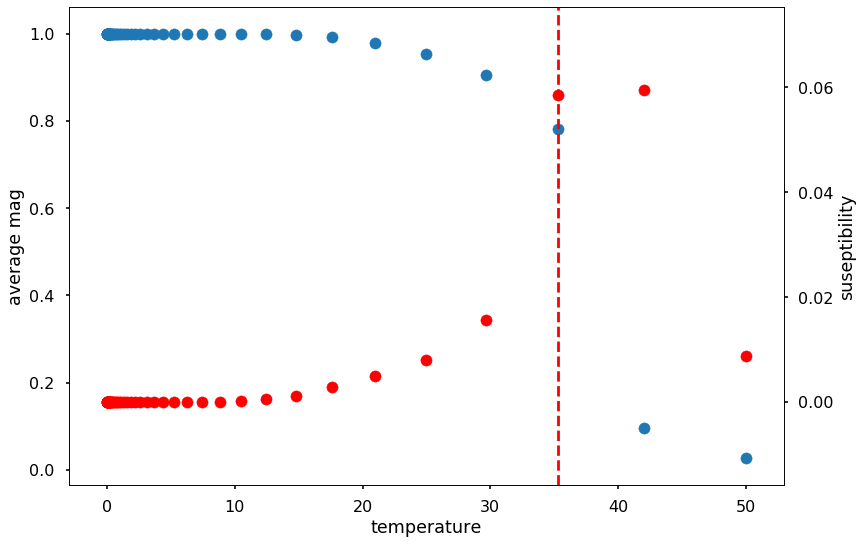

In [9]:
from matplotlib import style; style.use('seaborn-poster')
fig, ax = plt.subplots()
ax.scatter(temps, mag)
tax = ax.twinx()
tax.scatter(temps, sus, color = 'red')
ax.set(xlabel = 'temperature', ylabel = 'average mag')
tax.set_ylabel('suseptibility')
idx = np.argmin(abs(mag - .5 * mag.max()))
ax.axvline(temps[idx], color = 'red', linestyle = 'dashed')
fig.show()

In [11]:
m.rmapping

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: '10',
 11: '11',
 12: '12',
 13: '13',
 14: '14',
 15: '15',
 16: '16',
 17: '17',
 18: '18',
 19: '19',
 20: '20',
 21: '21',
 22: '22',
 23: '23',
 24: '24',
 25: '25',
 26: '26',
 27: '27',
 28: '28',
 29: '29',
 30: '30',
 31: '31',
 32: '32',
 33: '33',
 34: '34',
 35: '35',
 36: '36',
 37: '37',
 38: '38',
 39: '39',
 40: '40',
 41: '41',
 42: '42',
 43: '43',
 44: '44',
 45: '45',
 46: '46',
 47: '47',
 48: '48',
 49: '49'}

<IPython.core.display.Javascript object>


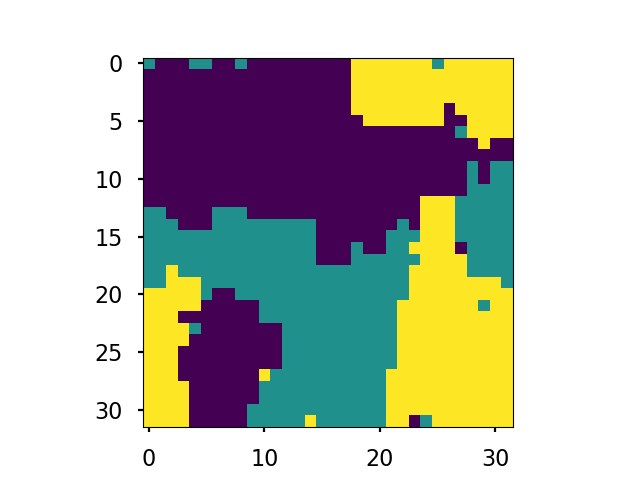

interactive(children=(IntSlider(value=0, description='time', max=99), Output()), _dom_classes=('widget-interac…

In [5]:
%matplotlib notebook
import ipywidgets as ipy
m.reset()
res = m.simulate(100)
fig, ax = plt.subplots()
h = ax.imshow(res[0].reshape(n, n))
fig.show()
@ipy.interact(time = ipy.widgets.IntSlider(min = 0, max = res.shape[0] - 1, value = 0))
def update(time):
    h.set_data(res[time].reshape(n, n))
    fig.canvas.draw(); fig.canvas.flush_events()
